In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,  OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler,  OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV , RepeatedKFold#GridSearch is for hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

In [21]:
# import dataset

df = pd.read_csv('https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/MBAN%206750%20HW/Employee_Attrition_Data_Set(1).csv')

In [22]:
df.head()

Employee ID  Age  Gender    Job Role Department  Monthly Income  \
0            1   50    Male          HR         IT           11547   
1            2   36    Male       Sales    Support            8643   
2            3   29    Male  Technician         HR           12418   
3            4   42    Male  Technician    Support           11441   
4            5   40  Female    Engineer      Sales            9178   

   Years at Company  Number of Promotions  Last Raise Percentage  \
0                12                     1              12.288783   
1                28                     4               3.496371   
2                12                     4               4.796945   
3                25                     1              10.310471   
4                25                     2               6.210127   

   Distance from Office  Job Satisfaction  Performance Rating Attrition  
0             41.307654                 9                   1        No  
1             44.733204                 8                   1       Yes  
2             18.646876                 1                   3        No  
3             15.790848                 8                   4        No  
4             41.239179                 6                   4        No

In [23]:
clean_data = df

In [24]:
clean_data.head()

Employee ID  Age  Gender    Job Role Department  Monthly Income  \
0            1   50    Male          HR         IT           11547   
1            2   36    Male       Sales    Support            8643   
2            3   29    Male  Technician         HR           12418   
3            4   42    Male  Technician    Support           11441   
4            5   40  Female    Engineer      Sales            9178   

   Years at Company  Number of Promotions  Last Raise Percentage  \
0                12                     1              12.288783   
1                28                     4               3.496371   
2                12                     4               4.796945   
3                25                     1              10.310471   
4                25                     2               6.210127   

   Distance from Office  Job Satisfaction  Performance Rating Attrition  
0             41.307654                 9                   1        No  
1             44.733204                 8                   1       Yes  
2             18.646876                 1                   3        No  
3             15.790848                 8                   4        No  
4             41.239179                 6                   4        No

In [25]:
clean_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating', 'Attrition'],
      dtype='object')

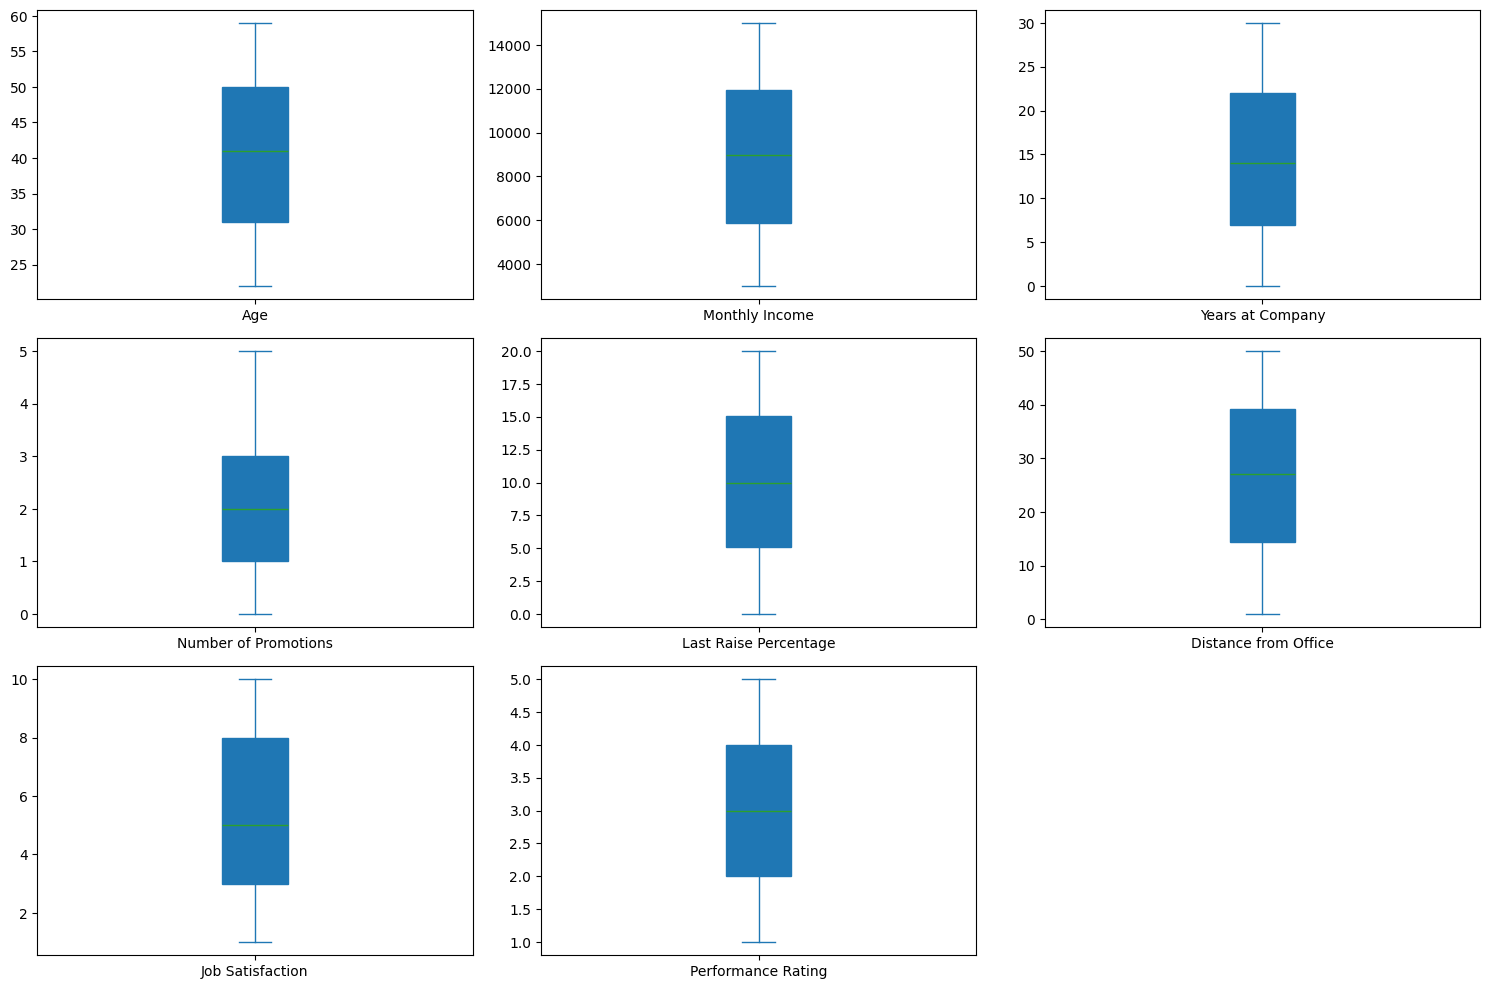

In [26]:
## several Boxplot in one graph
# List of variables of interest
variables_of_interest = ['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating']

# Create boxplots for each specified variable
clean_data[variables_of_interest].plot(kind="box", subplots=True, layout=(3, 3), figsize=(15, 10), patch_artist=True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [27]:
clean_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating', 'Attrition'],
      dtype='object')

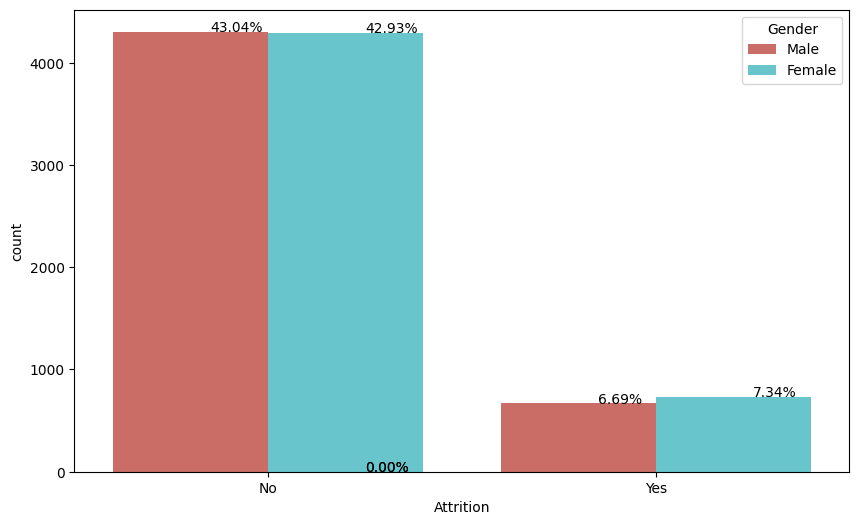

In [28]:
# Does gender affect satisfaction?
plt.figure(figsize = (10,6))
x=sns.countplot(data=clean_data,x='Attrition',hue='Gender',palette='hls')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/clean_data.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()
# ---> Gender doesn't affect the passengers' satisfaction

In [16]:
clean_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating', 'Attrition'],
      dtype='object')

In [29]:
# Convert categorical data to numeric
Gender_le = LabelEncoder()
Job_Role_le = LabelEncoder()
Department_le = LabelEncoder()
Attrition_le = LabelEncoder()

clean_data['Gender'] = Gender_le.fit_transform(clean_data['Gender'])
clean_data['Job Role'] = Job_Role_le.fit_transform(clean_data['Job Role'])
clean_data['Department'] = Department_le.fit_transform(clean_data['Department'])
clean_data['Attrition'] = Attrition_le.fit_transform(clean_data['Attrition'])

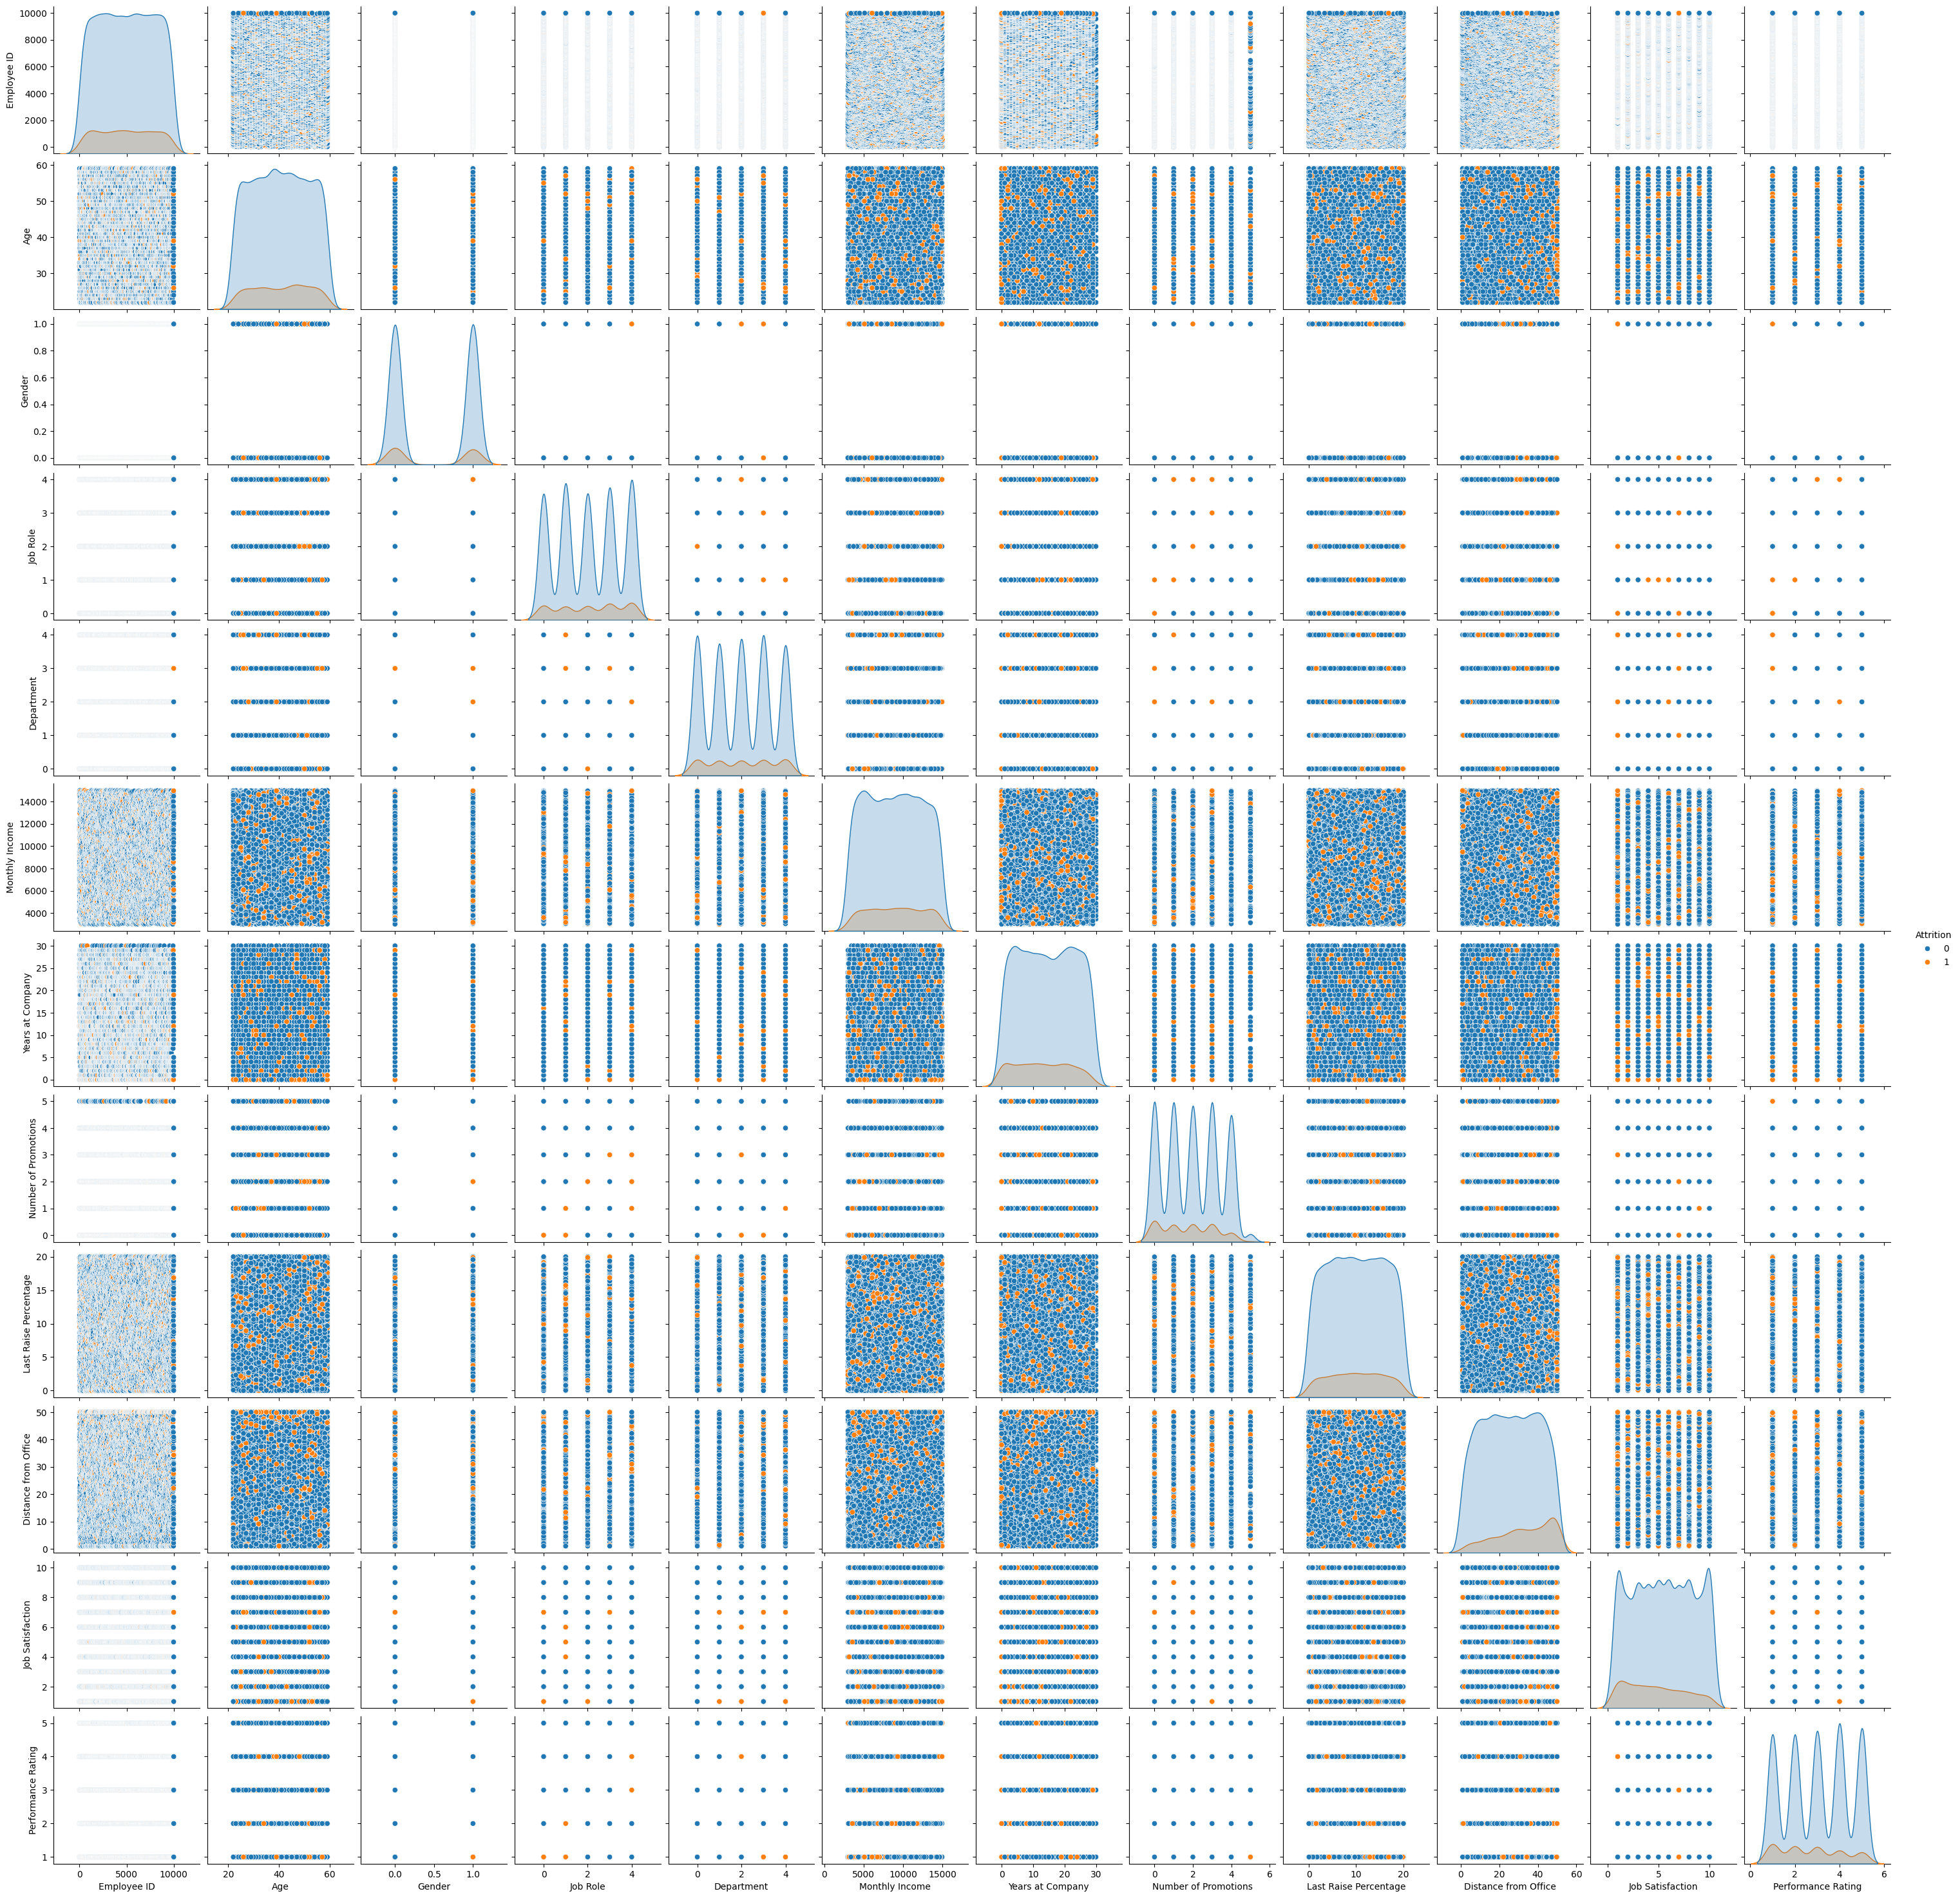

In [30]:
sns.pairplot(clean_data, hue='Attrition')

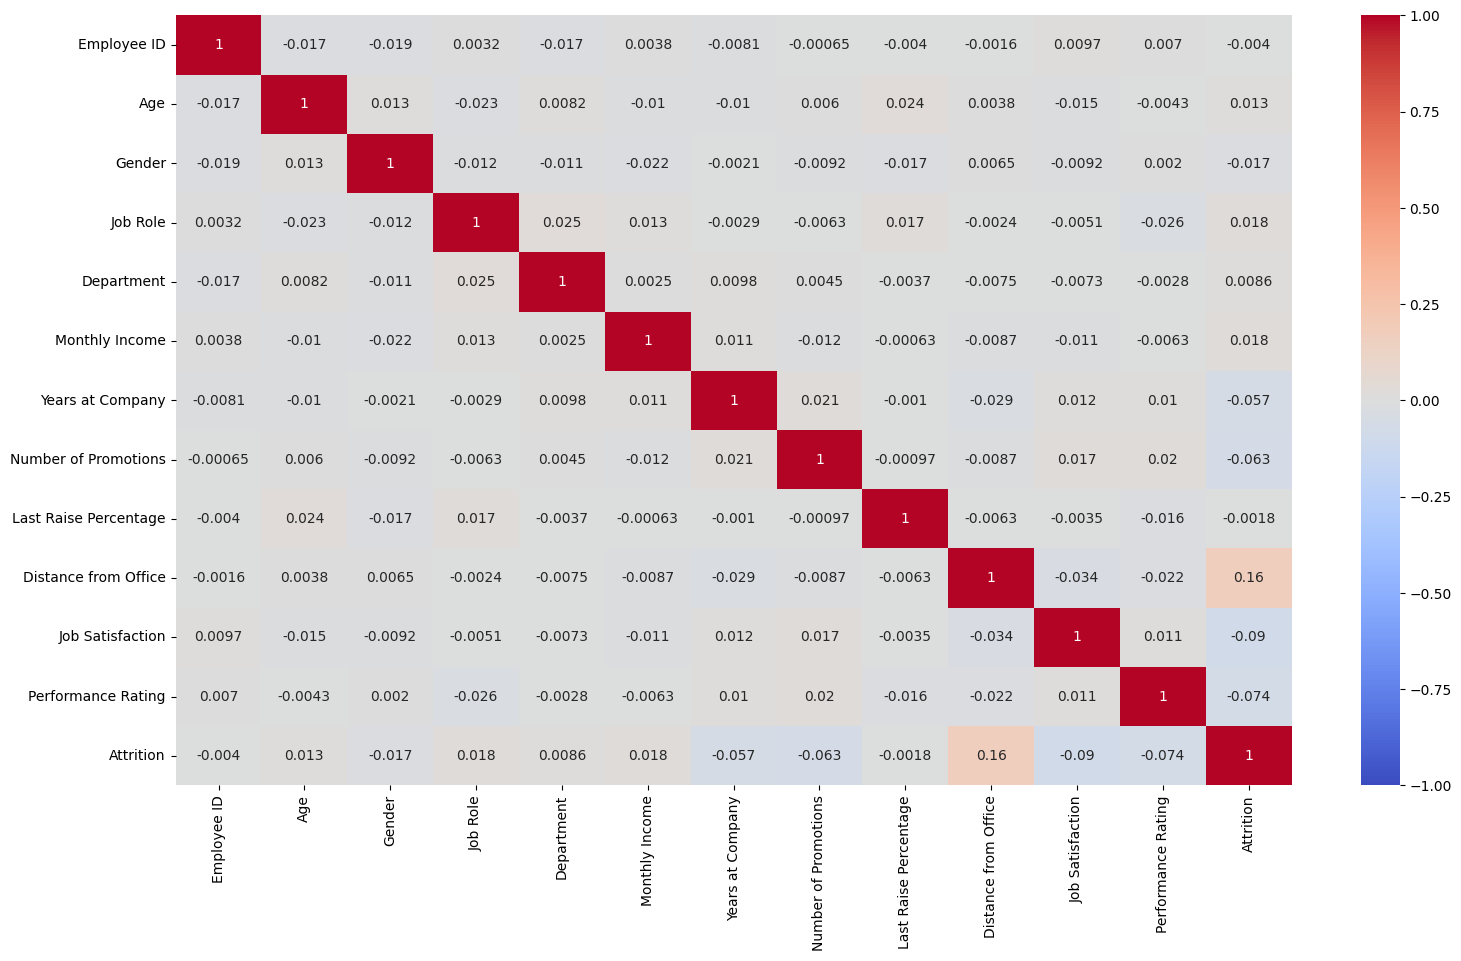

In [31]:
# Set the figure size for the heatmap
plt.figure(figsize=(18, 10))

# Create the heatmap
sns.heatmap(clean_data.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

# Display the plot
plt.show()

In [32]:
clean_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating', 'Attrition'],
      dtype='object')

In [ ]:
#model

In [35]:
clean_data.head()

Employee ID  Age  Gender  Job Role  Department  Monthly Income  \
0            1   50       1         1           2           11547   
1            2   36       1         3           4            8643   
2            3   29       1         4           1           12418   
3            4   42       1         4           4           11441   
4            5   40       0         0           3            9178   

   Years at Company  Number of Promotions  Last Raise Percentage  \
0                12                     1              12.288783   
1                28                     4               3.496371   
2                12                     4               4.796945   
3                25                     1              10.310471   
4                25                     2               6.210127   

   Distance from Office  Job Satisfaction  Performance Rating  Attrition  
0             41.307654                 9                   1          0  
1             44.733204                 8                   1          1  
2             18.646876                 1                   3          0  
3             15.790848                 8                   4          0  
4             41.239179                 6                   4          0

In [33]:
## split data into X variables and y variable

X = clean_data[['Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating']]
y = clean_data['Attrition']

In [34]:
# reserve 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [37]:
# demonstrate what MinMaxScaler() does
MinMaxScaler().fit_transform(clean_data[['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office']])

array([[0.75675676, 0.71230936, 0.4       , 0.2       , 0.61443914,
        0.82260519],
       [0.37837838, 0.47028919, 0.93333333, 0.8       , 0.17481855,
        0.89251436],
       [0.18918919, 0.78489874, 0.4       , 0.8       , 0.23984725,
        0.36014033],
       ...,
       [0.35135135, 0.8084007 , 0.03333333, 0.        , 0.00145795,
        0.24386757],
       [0.83783784, 0.75114593, 0.7       , 0.6       , 0.10531889,
        1.        ],
       [0.67567568, 0.17793149, 0.3       , 0.        , 0.34786377,
        0.36390293]])

In [38]:
# Define columns
numeric_columns = ['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office']
categorical_columns = ['Gender', 'Job Role', 'Department']
ordinal_columns = ['Job Satisfaction',
       'Performance Rating']

In [39]:
# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('ord', OrdinalEncoder(), ordinal_columns)
    ]
)

In [40]:
# we are going to test 3 models with cross validation to see which ones work best for this data
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()

In [41]:
# Define scoring functions
scoring = {'accuracy': make_scorer(accuracy_score), 
           'recall': make_scorer(recall_score),
           'precision': make_scorer(precision_score),
           'f1': 'f1'}

In [42]:
# Cross-validation evaluation for KNN model
knn_scores = cross_validate(knn, X_train, y_train, scoring=scoring, cv=5)
knn_accuracy = np.mean(knn_scores['test_accuracy'])
knn_recall = np.mean(knn_scores['test_recall'])
knn_precision = np.mean(knn_scores['test_precision'])
knn_f1 = np.mean(knn_scores['test_f1'])

# Cross-validation evaluation for Logistic Regression model
logreg_scores = cross_validate(logreg, X_train, y_train, scoring=scoring, cv=5)
logreg_accuracy = np.mean(logreg_scores['test_accuracy'])
logreg_recall = np.mean(logreg_scores['test_recall'])
logreg_precision = np.mean(logreg_scores['test_precision'])
logreg_f1 = np.mean(logreg_scores['test_f1'])

# Cross-validation evaluation for Naive Bayes model
nb_scores = cross_validate(nb, X_train, y_train, scoring=scoring, cv=5)
nb_accuracy = np.mean(nb_scores['test_accuracy'])
nb_recall = np.mean(nb_scores['test_recall'])
nb_precision = np.mean(nb_scores['test_precision'])
nb_f1 = np.mean(nb_scores['test_f1'])

# Cross-validation evaluation for Random Forest model
rf_scores = cross_validate(rf, X_train, y_train, scoring=scoring, cv=5)
rf_accuracy = np.mean(rf_scores['test_accuracy'])
rf_recall = np.mean(rf_scores['test_recall'])
rf_precision = np.mean(rf_scores['test_precision'])
rf_f1 = np.mean(rf_scores['test_f1'])

/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [43]:
print(f"Random Forest Mean Accuracy: {rf_accuracy}")
print(f"Random Forest Mean Recall: {rf_recall}")
print(f"Random Forest Mean Precision: {rf_precision}")
print(f"Random Forest Mean F1 Score: {rf_f1}")
print(f"KNN Mean Accuracy: {knn_accuracy}")
print(f"KNN Mean Recall: {knn_recall}")
print(f"KNN Mean Precision: {knn_precision}")
print(f"KNN Mean F1 Score: {knn_f1}")
print(f"Logistic Regression Mean Accuracy: {logreg_accuracy}")
print(f"Logistic Regression Mean Recall: {logreg_recall}")
print(f"Logistic Regression Mean Precision: {logreg_precision}")
print(f"Logistic Regression Mean F1 Score: {logreg_f1}")
print(f"Naive Bayes Mean Accuracy: {nb_accuracy}")
print(f"Naive Bayes Mean Recall: {nb_recall}")
print(f"Naive Bayes Mean Precision: {nb_precision}")
print(f"Naive Bayes Mean F1 Score: {nb_f1}")

Random Forest Mean Accuracy: 0.8625714285714287
Random Forest Mean Recall: 0.07624107850911974
Random Forest Mean Precision: 0.5296681141439206
Random Forest Mean F1 Score: 0.1327473010045614
KNN Mean Accuracy: 0.8477142857142856
KNN Mean Recall: 0.04221517314300819
KNN Mean Precision: 0.23580213903743313
KNN Mean F1 Score: 0.07148292065279796
Logistic Regression Mean Accuracy: 0.8611428571428572
Logistic Regression Mean Recall: 0.006185567010309278
Logistic Regression Mean Precision: 0.5416666666666666
Logistic Regression Mean F1 Score: 0.01207361501476192
Naive Bayes Mean Accuracy: 0.8615714285714284
Naive Bayes Mean Recall: 0.002061855670103093
Naive Bayes Mean Precision: 0.2
Naive Bayes Mean F1 Score: 0.004081632653061224
